<a href="https://colab.research.google.com/github/riak16/Sentiment-Analysis-Using-LSTMs/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from sklearn.metrics import accuracy_score


In [0]:
from keras.datasets import imdb

In [0]:
vocabSize = 5000
(dataTrain, labelTrain), (dataTest, labelTest) = imdb.load_data(num_words = vocabSize)

In [0]:
print("Shape of dataTrain: " + str(dataTrain.shape))
print("Shape of dataTest: " + str(dataTest.shape))
print("Shape of labelTrain: " + str(labelTrain.shape))
print("Shape of labelTest: " + str(labelTest.shape))

Shape of dataTrain: (25000,)
Shape of dataTest: (25000,)
Shape of labelTrain: (25000,)
Shape of labelTest: (25000,)


In [0]:
reviewLength = 500

dataTrain = sequence.pad_sequences(dataTrain, maxlen = reviewLength)
dataTest = sequence.pad_sequences(dataTest, maxlen= reviewLength)

print("Shape of dataTrain: " + str(dataTrain.shape))
print("Shape of dataTest: " + str(dataTest.shape))
print("Shape of labelTrain: " + str(labelTrain.shape))
print("Shape of labelTest: " + str(labelTest.shape))


Shape of dataTrain: (25000, 500)
Shape of dataTest: (25000, 500)
Shape of labelTrain: (25000,)
Shape of labelTest: (25000,)


In [0]:
model = tf.keras.models.Sequential()
# This is to create word embeddings(eg glove, word2Vec), 
# input is #words in vocab = vocabSize, output is size of our word embedding = hyper-parameter
# input_length is the size of our final review vector = # words in a review. 
model.add(tf.keras.layers.Embedding(input_dim = vocabSize, output_dim = 32, input_length = reviewLength))
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 32, dropout=0.4)))
model.add(tf.keras.layers.Dropout(rate = 0.4))
model.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.2))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
dropout_45 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
_________________________________________________________________
dropout_47 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

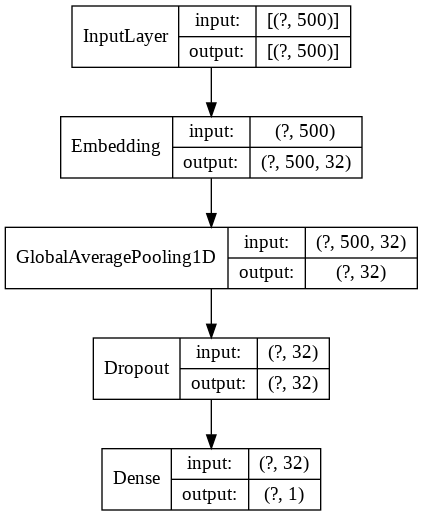

In [0]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [0]:
trainer = model.fit(x=dataTrain, y=labelTrain, batch_size=256, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
79/79 - 7s - loss: 0.6753 - accuracy: 0.5739 - val_loss: 0.5507 - val_accuracy: 0.7860
Epoch 2/5
79/79 - 7s - loss: 0.4247 - accuracy: 0.8224 - val_loss: 0.3230 - val_accuracy: 0.8660
Epoch 3/5
79/79 - 7s - loss: 0.3142 - accuracy: 0.8834 - val_loss: 0.2861 - val_accuracy: 0.8814
Epoch 4/5
79/79 - 7s - loss: 0.2744 - accuracy: 0.9010 - val_loss: 0.3097 - val_accuracy: 0.8712
Epoch 5/5
79/79 - 7s - loss: 0.2571 - accuracy: 0.9071 - val_loss: 0.2984 - val_accuracy: 0.8818


In [0]:
from sklearn.metrics import classification_report
classNames = ["Negative", "Positive"]
predictions = model.predict_classes(dataTest)
print(classification_report(labelTest, predictions, target_names= classNames))
print(accuracy_score(labelTest, predictions,normalize=True))

              precision    recall  f1-score   support

    Negative       0.85      0.92      0.88     12500
    Positive       0.91      0.84      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

0.87616
